# Load Libraries

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from load_and_save_files import load_mnist, load_alphabet, load_pickle

# Let's Take a Look at the MNIST dataset

In [54]:
train_x_mnist, train_y_mnist, test_x_mnist, test_y_mnist = load_mnist()

print('Shape of training data: ', train_x_mnist.shape)
print('Shape of training labels: ', train_y_mnist.shape)
print('Shape of testing data: ', test_x_mnist.shape)
print('Shape of testing labels: ', test_y_mnist.shape)

train_x_mnist, train_y_mnist, test_x_mnist, test_y_mnist = [pd.DataFrame(x) for x in [train_x_mnist, train_y_mnist, test_x_mnist, test_y_mnist]]

# suffle
train_x_mnist, train_y_mnist = train_x_mnist.sample(frac=1, random_state=42), train_y_mnist.sample(frac=1, random_state=42)
test_x_mnist, test_y_mnist = test_x_mnist.sample(frac=1, random_state=42), test_y_mnist.sample(frac=1, random_state=42)

Shape of training data:  (60000, 784)
Shape of training labels:  (60000,)
Shape of testing data:  (10000, 784)
Shape of testing labels:  (10000,)


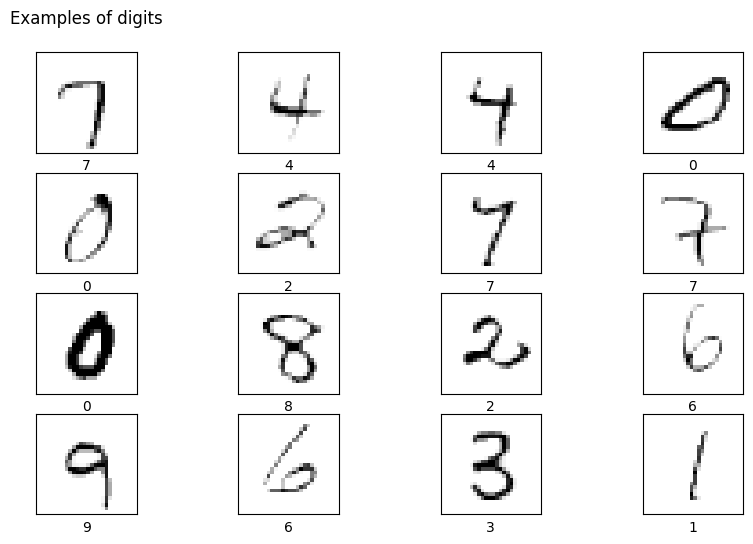

In [55]:
# show the first 16 images with matplotlib and write the labels on the plot
fig, ax = plt.subplots(4, 4, figsize=(10, 6))

for i, axi in enumerate(ax.flat):
    axi.imshow(train_x_mnist.iloc[i].values.reshape(28, 28), cmap='binary')
    axi.set(xticks=[], yticks=[], xlabel=train_y_mnist.iloc[i].values[0])
ax[0, 0].set(title='Examples of digits\n');
plt.show()

# Let's Take a Look at the Alphabet Dataset

In [56]:
train_x_alphabet, train_y_alphabet, valid_x_alphabet, valid_y_alphabet, test_x_alphabet, test_y_alphabet = load_alphabet()
# add validation to the end of training set
train_x_alphabet = np.concatenate((train_x_alphabet, valid_x_alphabet))
train_y_alphabet = np.concatenate((train_y_alphabet, valid_y_alphabet))

print('Shape of training data: ', train_x_alphabet.shape)
print('Shape of training labels: ', train_y_alphabet.shape)
print('Shape of testing data: ', test_x_alphabet.shape)
print('Shape of testing labels: ', test_y_alphabet.shape)

# Convert to pandas dataframe
train_x_alphabet, train_y_alphabet, test_x_alphabet, test_y_alphabet = [pd.DataFrame(x) for x in [train_x_alphabet, train_y_alphabet, test_x_alphabet, test_y_alphabet]]

# suffle
train_x_alphabet, train_y_alphabet = train_x_alphabet.sample(frac=1, random_state=42), train_y_alphabet.sample(frac=1, random_state=42)
test_x_alphabet, test_y_alphabet = test_x_alphabet.sample(frac=1, random_state=42), test_y_alphabet.sample(frac=1, random_state=42)

Shape of training data:  (38589, 784)
Shape of training labels:  (38589,)
Shape of testing data:  (7752, 784)
Shape of testing labels:  (7752,)


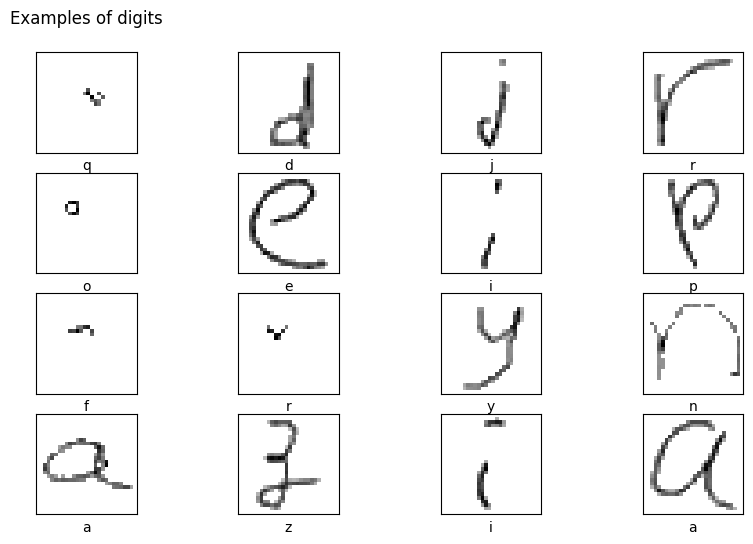

In [57]:
# show the first 16 images with matplotlib and write the labels on the plot
fig, ax = plt.subplots(4, 4, figsize=(10, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(train_x_alphabet.iloc[i].values.reshape(28, 28), cmap='binary')
    letter = chr(train_y_alphabet.iloc[i].values[0])
    axi.set(xticks=[], yticks=[], xlabel=letter)
ax[0, 0].set(title='Examples of digits\n');
plt.show()

# Load Preprocessed Data Sets

In [58]:
data = load_pickle("data/preprocessed_data.pkl")

train_x, train_y, test_x, test_y = data["train_x"], data["train_y"], data["test_x"], data["test_y"]

print('Shape of training data: ', train_x.shape)
print('Shape of training labels: ', train_y.shape)
print('Shape of testing data: ', test_x.shape)
print('Shape of testing labels: ', test_y.shape)

Shape of training data:  (62589, 784)
Shape of training labels:  (62589, 1)
Shape of testing data:  (11752, 784)
Shape of testing labels:  (11752, 1)


# Function for Drawing Confusion Matrix

In [59]:
labels = np.arange(36)
labels = labels.astype(str)
labels[:10] = labels[:10].astype(int)
labels[10:] = list(map(chr, range(97, 123)))

def confusion_matrix_plot(y_true, y_pred, title, labels=labels):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    plt.figure(figsize=(15, 15))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Artificial Neural Network Model Testing

In [60]:
mlp_model = pickle.load(open('model/multi_layer_perceptron.pkl', 'rb'))
y_pred = mlp_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       405
           1       0.97      0.98      0.98       485
           2       0.92      0.90      0.91       434
           3       0.92      0.94      0.93       394
           4       0.91      0.92      0.92       364
           5       0.90      0.91      0.91       329
           6       0.92      0.92      0.92       381
           7       0.94      0.93      0.93       408
           8       0.92      0.90      0.91       383
           9       0.93      0.90      0.92       417
          97       0.73      0.76      0.74       511
          98       0.70      0.64      0.67       196
          99       0.68      0.69      0.68       243
         100       0.76      0.80      0.78       271
         101       0.80      0.81      0.81       656
         102       0.63      0.66      0.65       199
         103       0.65      0.77      0.71       216
         104       0.72    

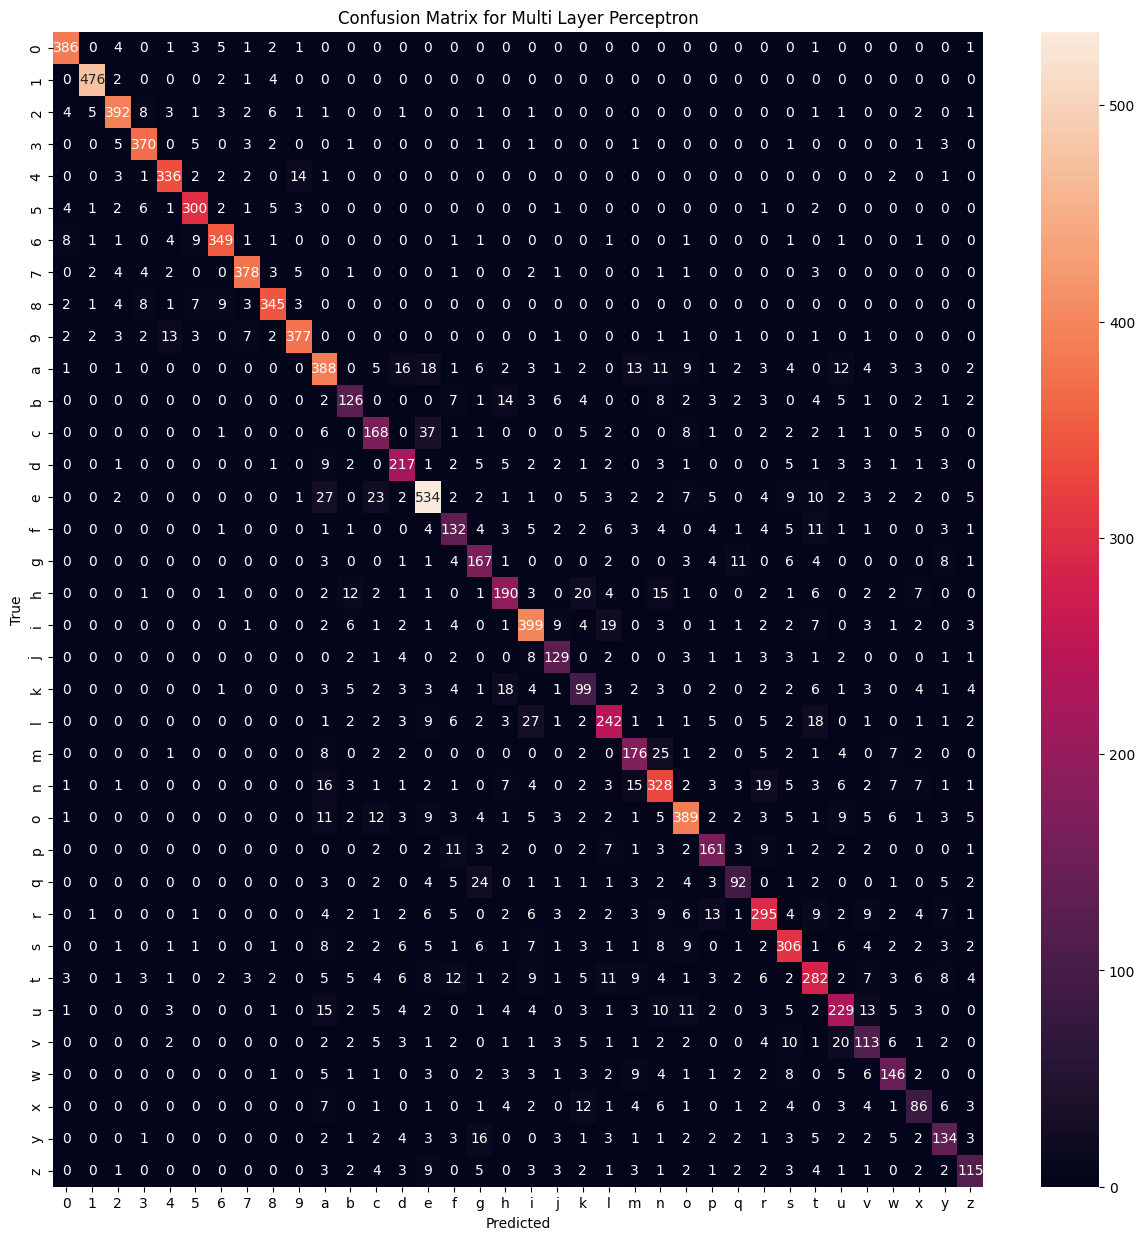

In [61]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for Multi Layer Perceptron')

In [62]:
test_acc = accuracy_score(test_y, y_pred) * 100
print('Test Accuracy: ', test_acc)

Test Accuracy:  79.5779441797141


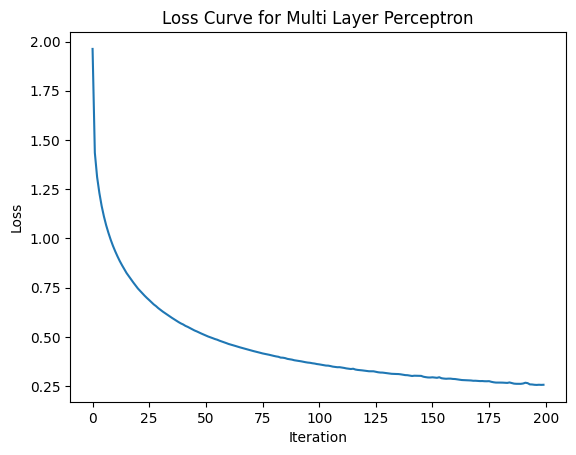

In [63]:
loss_values = mlp_model.loss_curve_
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve for Multi Layer Perceptron')
plt.show()

# Logistic Regression Model Test

In [64]:
lr_model = pickle.load(open('model/logistic_regression.pkl', 'rb'))
y_pred = lr_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       405
           1       0.93      0.98      0.95       485
           2       0.87      0.85      0.86       434
           3       0.83      0.89      0.86       394
           4       0.86      0.87      0.87       364
           5       0.78      0.80      0.79       329
           6       0.88      0.91      0.90       381
           7       0.90      0.91      0.91       408
           8       0.84      0.80      0.82       383
           9       0.88      0.88      0.88       417
          97       0.68      0.58      0.62       511
          98       0.65      0.48      0.56       196
          99       0.48      0.49      0.49       243
         100       0.56      0.63      0.59       271
         101       0.73      0.68      0.70       656
         102       0.46      0.41      0.43       199
         103       0.60      0.52      0.55       216
         104       0.60    

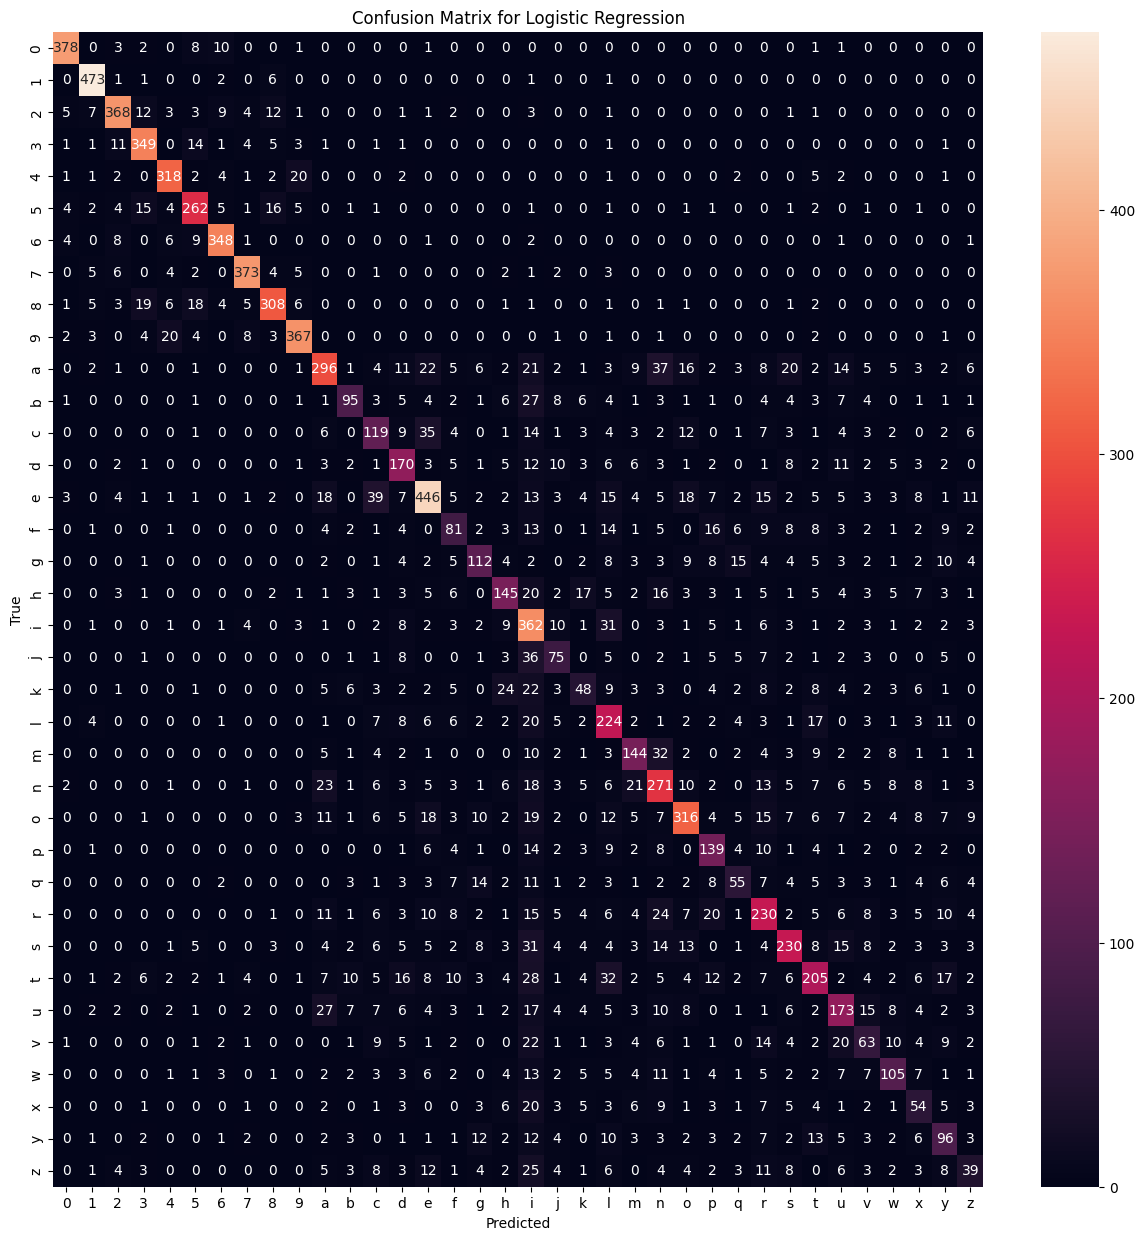

In [65]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for Logistic Regression')

In [66]:
test_acc = accuracy_score(test_y, y_pred) * 100
print('Test Accuracy: ', test_acc)

Test Accuracy:  66.68652144315861


# K Nearest Neighbors Model Test

In [67]:
knn_model = pickle.load(open('model/k_nearest_neighbors.pkl', 'rb'))
y_pred = knn_model.predict(test_x)
print(classification_report(test_y, y_pred))

/Users/turhancan97/opt/anaconda3/envs/number-letter-recognition/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       405
           1       0.72      0.98      0.83       485
           2       0.91      0.82      0.86       434
           3       0.92      0.87      0.89       394
           4       0.80      0.88      0.84       364
           5       0.85      0.80      0.82       329
           6       0.90      0.92      0.91       381
           7       0.85      0.88      0.86       408
           8       0.96      0.79      0.87       383
           9       0.88      0.85      0.87       417
          97       0.65      0.71      0.68       511
          98       0.49      0.63      0.55       196
          99       0.42      0.77      0.54       243
         100       0.64      0.73      0.68       271
         101       0.71      0.65      0.68       656
         102       0.49      0.57      0.53       199
         103       0.79      0.57      0.66       216
         104       0.63    

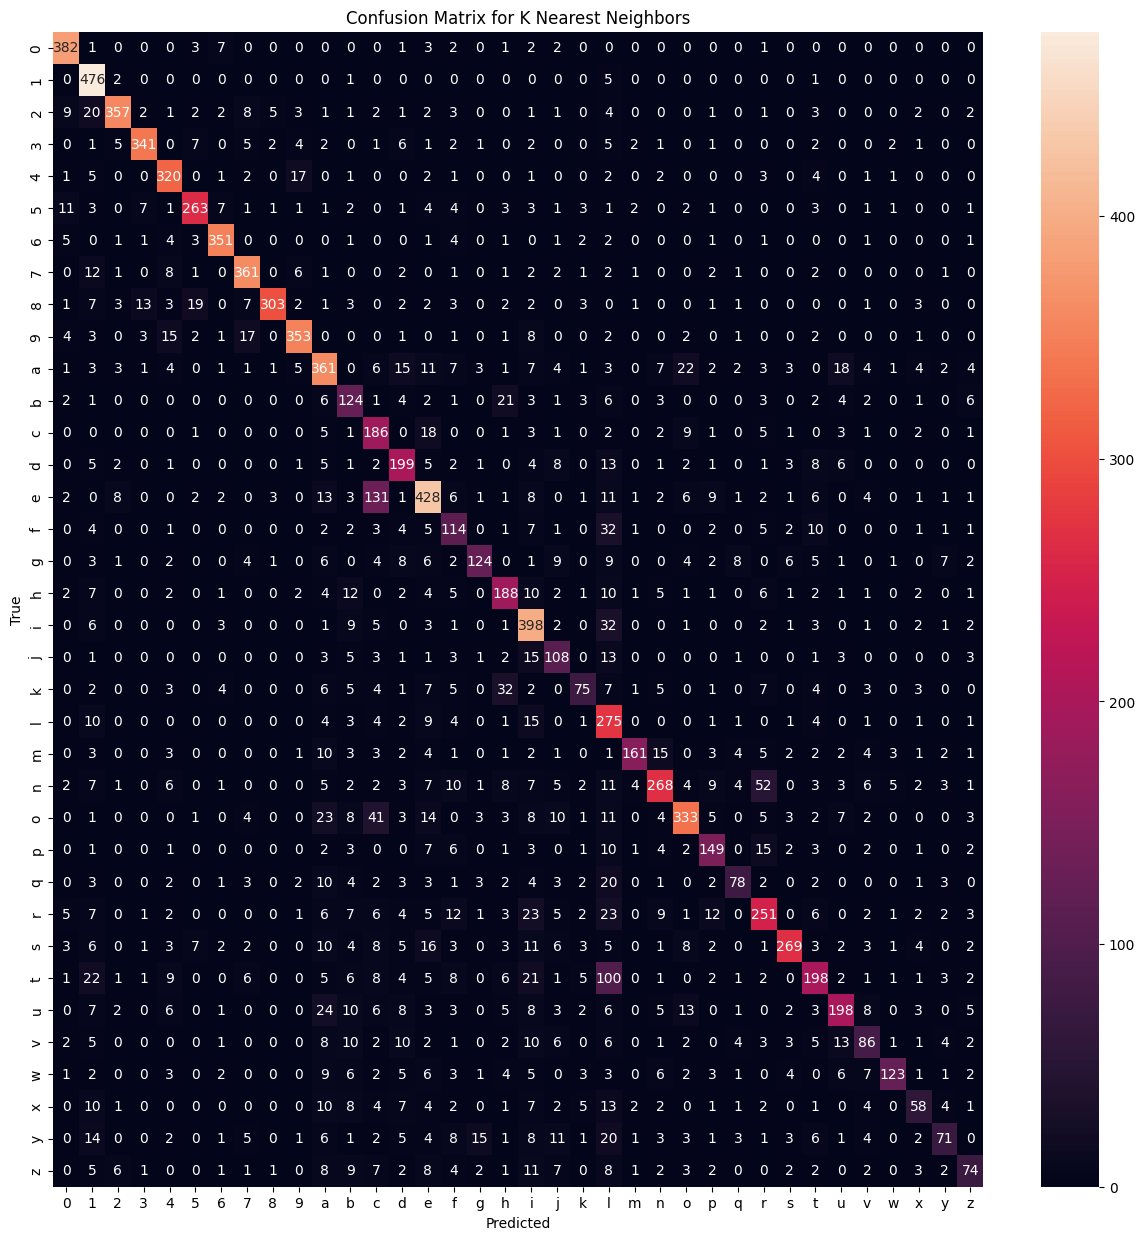

In [68]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for K Nearest Neighbors')


In [69]:
test_acc = accuracy_score(test_y, y_pred) * 100
print('Test Accuracy: ', test_acc)

Test Accuracy:  71.51123213070115


# Decision Tree Model Test

In [70]:
dt_model = pickle.load(open('model/decision_tree.pkl', 'rb'))
y_pred = dt_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       405
           1       0.87      0.92      0.89       485
           2       0.63      0.61      0.62       434
           3       0.64      0.68      0.66       394
           4       0.70      0.74      0.72       364
           5       0.56      0.61      0.59       329
           6       0.69      0.72      0.70       381
           7       0.76      0.80      0.78       408
           8       0.53      0.54      0.54       383
           9       0.72      0.75      0.73       417
          97       0.63      0.53      0.58       511
          98       0.49      0.53      0.51       196
          99       0.62      0.70      0.66       243
         100       0.56      0.52      0.54       271
         101       0.65      0.64      0.64       656
         102       0.42      0.48      0.45       199
         103       0.50      0.51      0.50       216
         104       0.57    

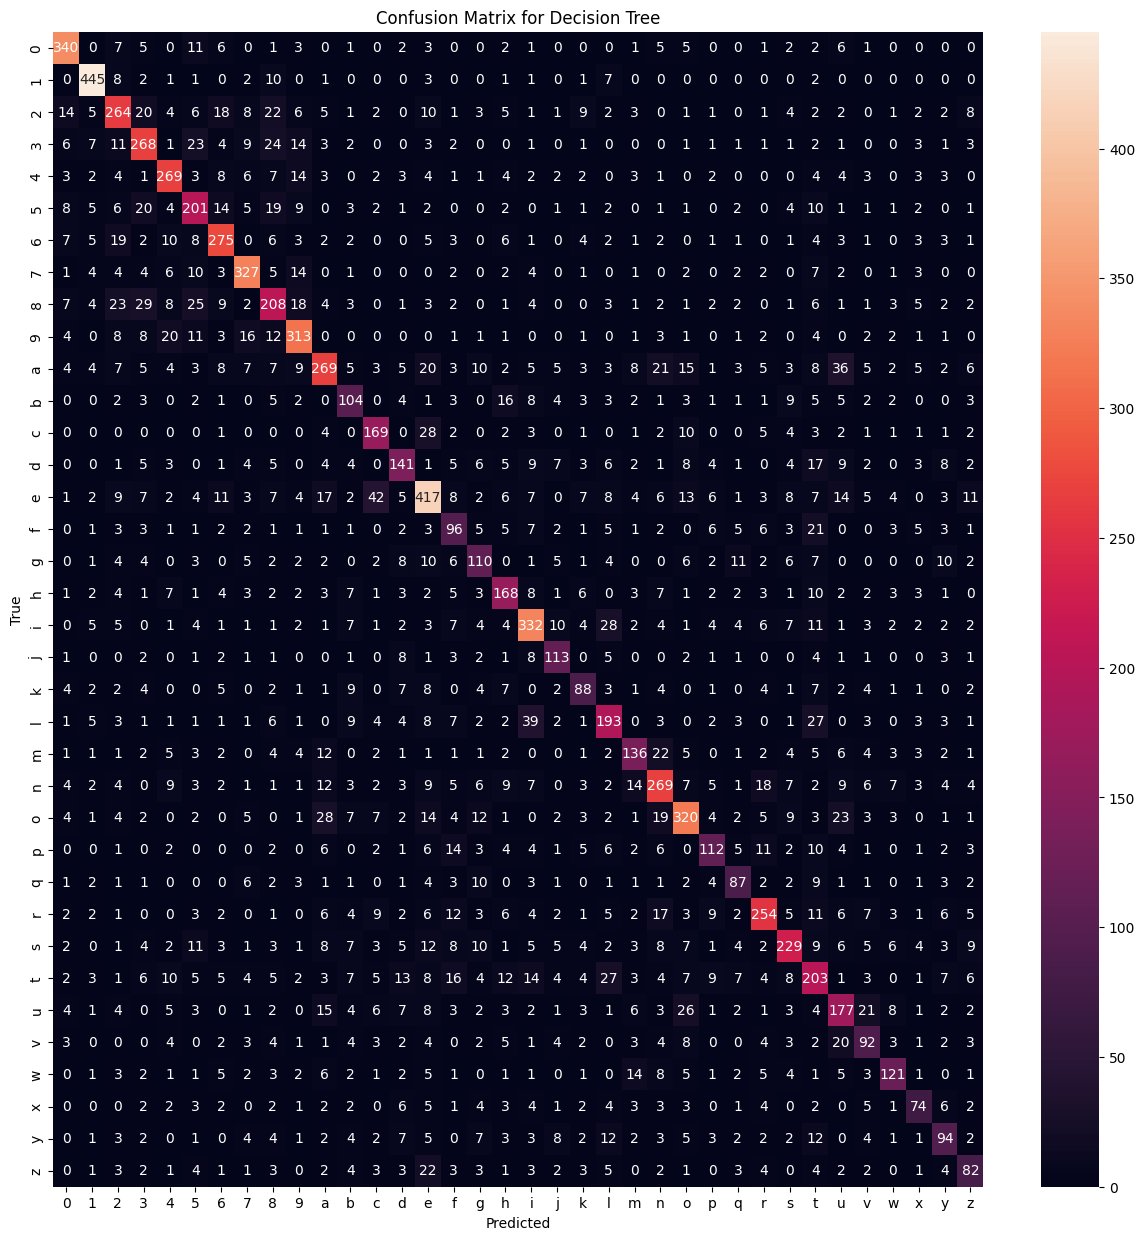

In [71]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for Decision Tree')

In [72]:
test_acc = accuracy_score(test_y, y_pred) * 100
print('Test Accuracy: ', test_acc)

Test Accuracy:  62.62763784887678


# Random Forest Model Test

In [77]:
rf_model = pickle.load(open('model/random_forest.pkl', 'rb'))
y_pred = rf_model.predict(test_x)
print(classification_report(test_y, y_pred))

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


              precision    recall  f1-score   support

           0       0.87      0.98      0.92       405
           1       0.91      0.99      0.95       485
           2       0.82      0.91      0.86       434
           3       0.91      0.94      0.92       394
           4       0.79      0.95      0.86       364
           5       0.84      0.91      0.87       329
           6       0.87      0.97      0.91       381
           7       0.88      0.94      0.91       408
           8       0.85      0.90      0.87       383
           9       0.87      0.92      0.89       417
          97       0.75      0.80      0.78       511
          98       0.86      0.73      0.79       196
          99       0.88      0.73      0.80       243
         100       0.78      0.84      0.81       271
         101       0.79      0.88      0.83       656
         102       0.93      0.72      0.81       199
         103       0.76      0.71      0.73       216
         104       0.78    

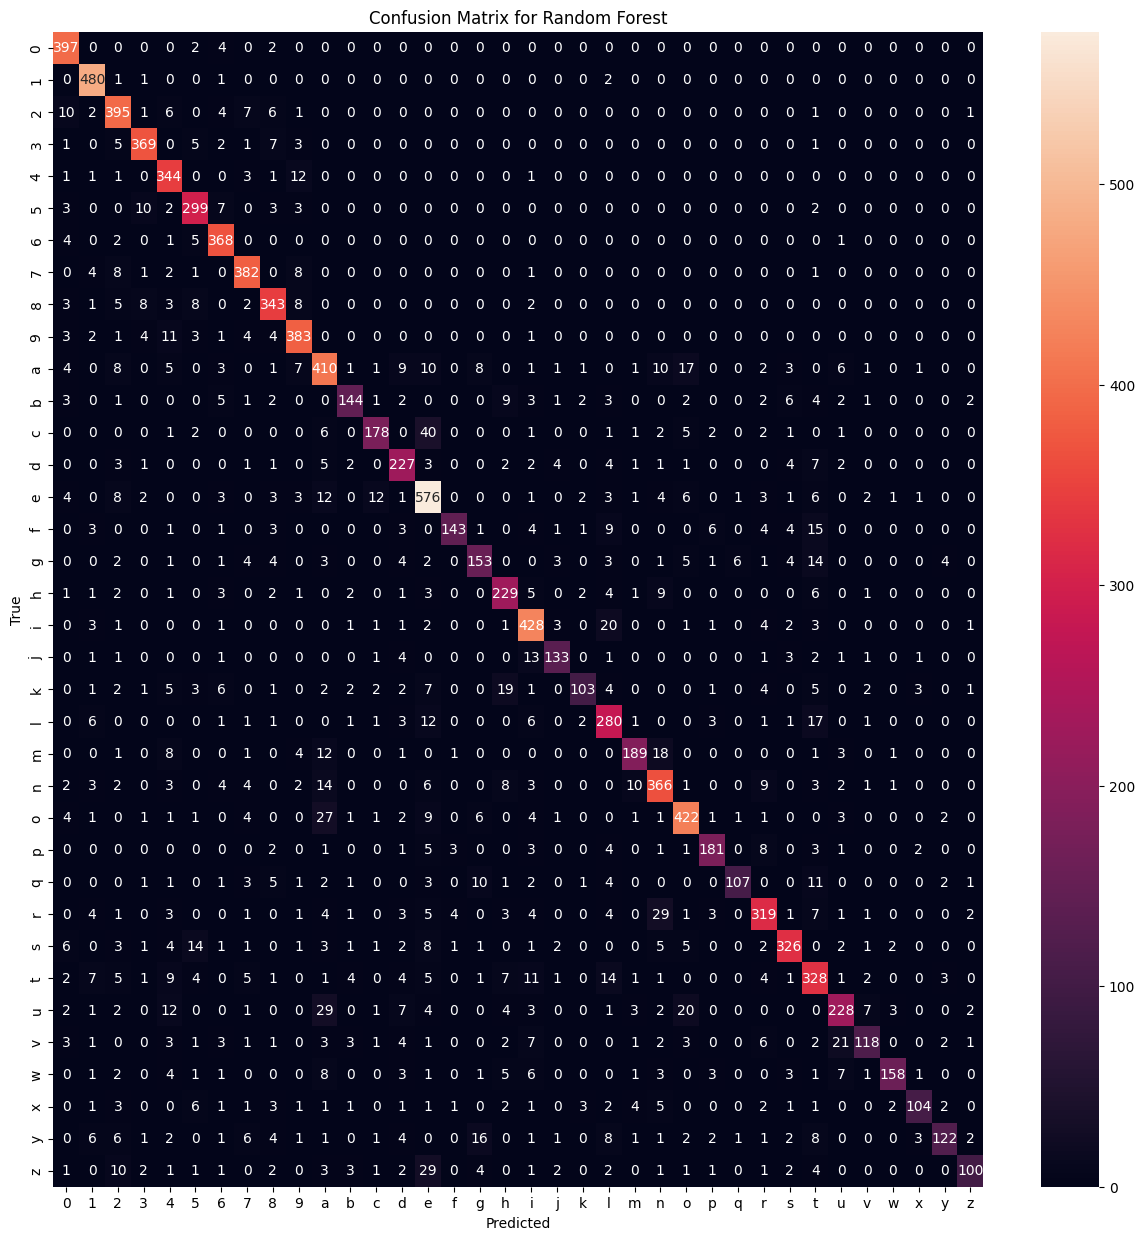

In [78]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for Random Forest')

In [79]:
test_acc = accuracy_score(test_y, y_pred) * 100
print('Test Accuracy: ', test_acc)

Test Accuracy:  83.66235534377128


# Best Model Result

In [73]:
best_model = pickle.load(open('model/best_model.pkl', 'rb'))
y_pred = best_model.predict(test_x)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       405
           1       0.99      0.98      0.99       485
           2       0.92      0.95      0.94       434
           3       0.96      0.96      0.96       394
           4       0.93      0.95      0.94       364
           5       0.93      0.95      0.94       329
           6       0.95      0.94      0.94       381
           7       0.94      0.96      0.95       408
           8       0.94      0.92      0.93       383
           9       0.95      0.94      0.94       417
          97       0.89      0.84      0.86       511
          98       0.82      0.81      0.82       196
          99       0.81      0.81      0.81       243
         100       0.87      0.88      0.88       271
         101       0.89      0.88      0.89       656
         102       0.83      0.80      0.81       199
         103       0.81      0.81      0.81       216
         104       0.84    

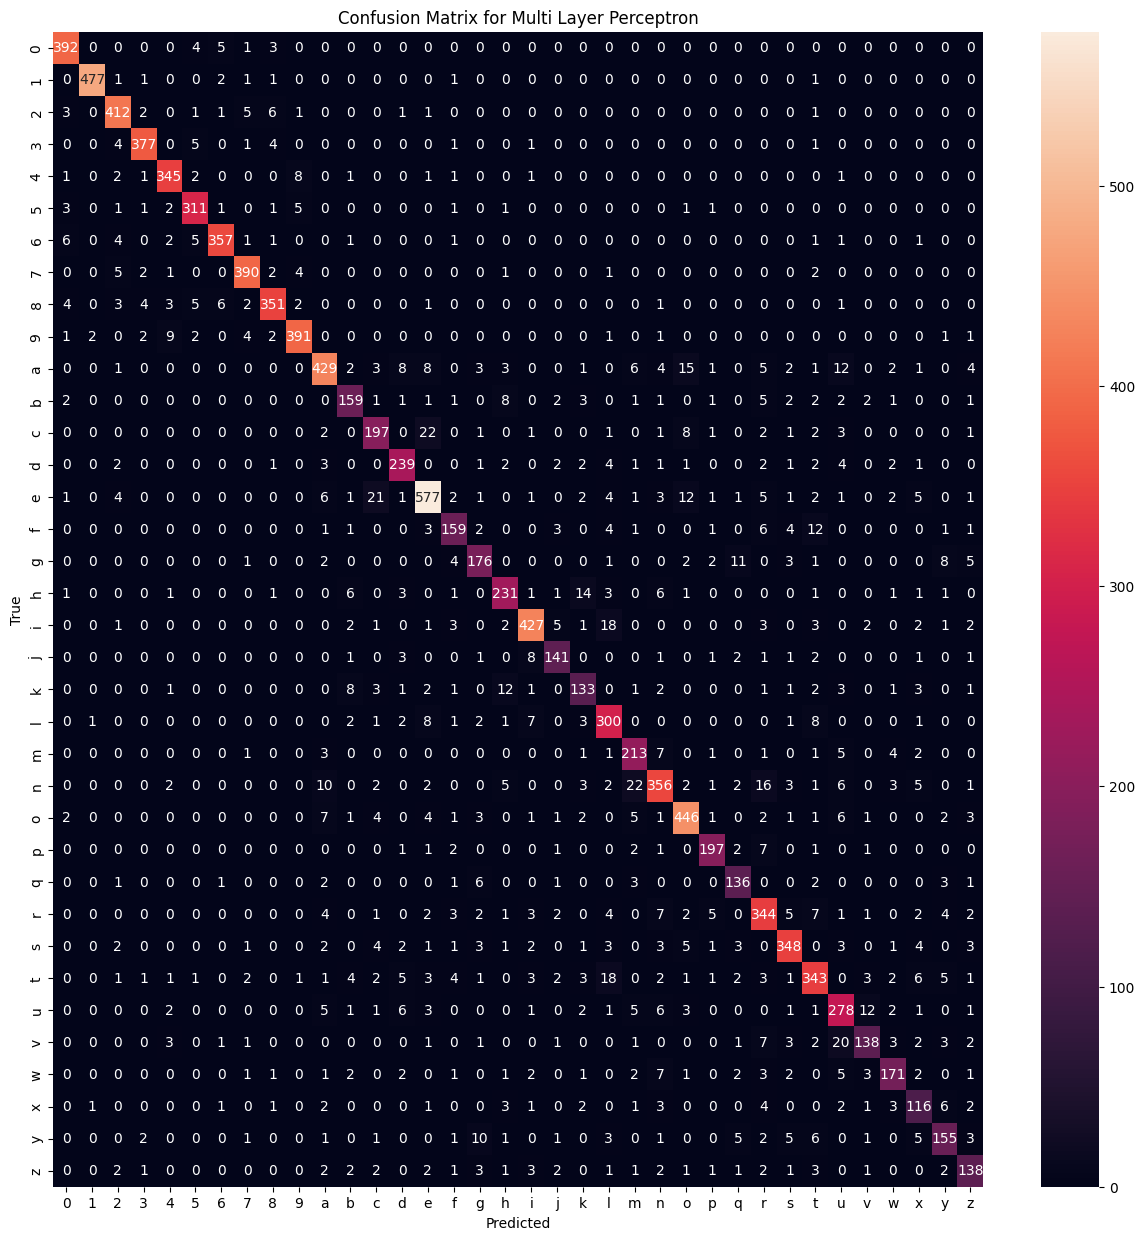

In [74]:
# confusion matrix
confusion_matrix_plot(test_y, y_pred, 'Confusion Matrix for Multi Layer Perceptron')

In [75]:
test_acc = accuracy_score(test_y, y_pred) * 100
print('Test Accuracy: ', test_acc)

Test Accuracy:  88.07011572498298


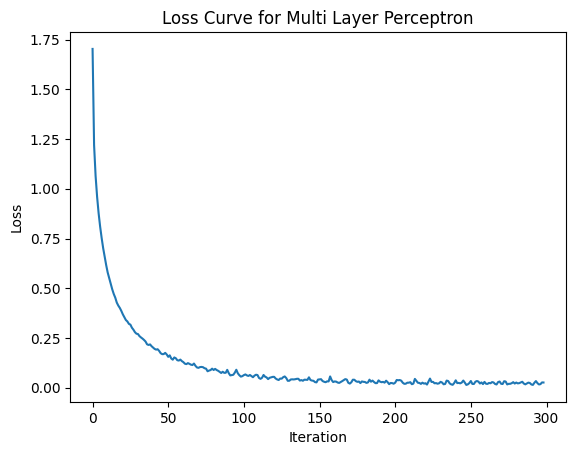

In [76]:
loss_values = best_model.loss_curve_
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve for Multi Layer Perceptron')
plt.show()